Baseado no: steepestDescentDemo.ipynb.
https://github.com/probml/pyprobml/blob/auto_notebooks_md/notebooks.md#steepestDescentDemo.ipynb

Matheus Rodrigues da Silva Espalaor

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, line_search


def aoki_vectorized(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[:][0]) - x[:][1]) + 0.5 * np.square(x[:][0] - 1)
    return f


def aoki(x):
    """
    F(x,y) = 0.5 (x^2 - y)^2 + 0.5 (x-1)^2
    """
    f = 0.5 * np.square(np.square(x[0]) - x[1]) + 0.5 * np.square(x[0] - 1)
    return f


def aoki_gd(x):
    """
    First-Order derivative of aoki function(Nabia - 1)
    """
    g_x = 2 * np.dot((np.square(x[0]) - x[1]), x[0]) + x[0] - 1
    g_y = -1 * (np.square(x[0]) - x[1])
    return np.array((g_x, g_y))


def aoki_hess(x):
    """
    Second-Order derivative - Hessian Matrix of aoki function(Nabia - 2)
    """
    g_xx = 6 * np.square(x[0]) - 2 * x[1] + 1
    g_xy = -2 * x[0]
    g_yy = 1
    H = np.diag((2, 2))
    H[0][0] = g_xx
    H[0][1] = g_xy
    H[1][0] = g_xy
    H[1][1] = g_yy
    return H

Vamos aplicar os algoritmos mostrados em:
Algorithms for Optimization, Tim A. Wheeler, Mykel J. Kochenderfer, Cap 5



In [9]:
#x0 = np.array((0.0, 0.0))
#g1 = aoki_gd(x0)
#d1 = -g1

In [57]:
def stepPart(f, nabla_f, x_i, y_i, d1, step_size=None):
  if step_size is None:
    # Compute a step size using a line_search to satisfy the Wolf
    # conditions
    step = line_search(f, nabla_f, np.r_[x_i, y_i], d1, c2=0.05)

    #print("passei")
    step = step[0]
    if step is None:
        step = 0
  else:
    step = step_size
  return step

def conjugateGradienteDescent(f, nabla_f, x, step_size=None):
  g1 = nabla_f(x) #Primeiro g
  print(g1)
  d1 = -g1 #primeira direção
  all_x_i = list()
  all_y_i = list()
  x_i = x[0]
  y_i = x[1]
  all_x_i.append(x_i)
  all_y_i.append(y_i)
  print(d1)
  alpha = stepPart(f, nabla_f, x_i, y_i, np.r_[d1[0], d1[1]], step_size)
  #print(alpha)
  x_i = x_i + alpha * d1[0] #Página 72 do livro
  y_i = y_i + alpha * d1[1]

  for i in range(100):
    all_x_i.append(x_i)
    all_y_i.append(y_i)
    g_prime = nabla_f(np.r_[x_i, y_i])
    #Usando o Beta de Polak-Ribière
    beta = max(0, (np.dot(np.transpose(g_prime), (g_prime - g1))) / (np.dot(np.transpose(g1), g1)))
    #print(beta)
    d_prime = -g_prime + beta*d1

    alpha = stepPart(f, nabla_f, x_i, y_i, np.r_[d_prime[0], d_prime[1]], step_size)
    x_i = x_i + alpha * d_prime[0] #Página 72 do livro
    y_i = y_i + alpha * d_prime[1]
    g1 = g_prime
    d1 = d_prime

  return all_x_i, all_y_i


In [60]:
def gradient_descent(x0, f, f_prime, hessian, stepsize=None):
    """
    Steepest-Descent algorithm with option for line search
    """
    x_i, y_i = x0
    all_x_i = list()
    all_y_i = list()
    all_f_i = list()

    for i in range(1, 100):
        all_x_i.append(x_i)
        all_y_i.append(y_i)
        all_f_i.append(f([x_i, y_i]))
        dx_i, dy_i = f_prime(np.asarray([x_i, y_i]))
        if stepsize is None:
            # Compute a step size using a line_search to satisfy the Wolf
            # conditions
            step = line_search(f, f_prime, np.r_[x_i, y_i], -np.r_[dx_i, dy_i], np.r_[dx_i, dy_i], c2=0.05)
            step = step[0]
            if step is None:
                step = 0
        else:
            step = stepsize
        x_i += -step * dx_i
        y_i += -step * dy_i
        if np.abs(all_f_i[-1]) < 1e-16:
            break
    return all_x_i, all_y_i, all_f_i

[-1. -0.]
[1. 0.]
[0.0, 0.5898539825788157, 0.9167161559730241, 0.9952929359664267, 0.9998882582432155, 0.9998465360087563, 0.9999999905280471, 1.0000000024851985, 0.9999999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.9394535107699834, 0.9871171388037315, 0.9996061336934482, 0.9996371770950668, 1.000000011158091, 1.0000000059922602, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

<ipython-input-57-48e21cfaf4d5>:36: RuntimeWarning: invalid value encountered in scalar divide
  beta = max(0, (np.dot(np.transpose(g_prime), (g_prime - g1))) / (np.dot(np.transpose(g1), g1)))


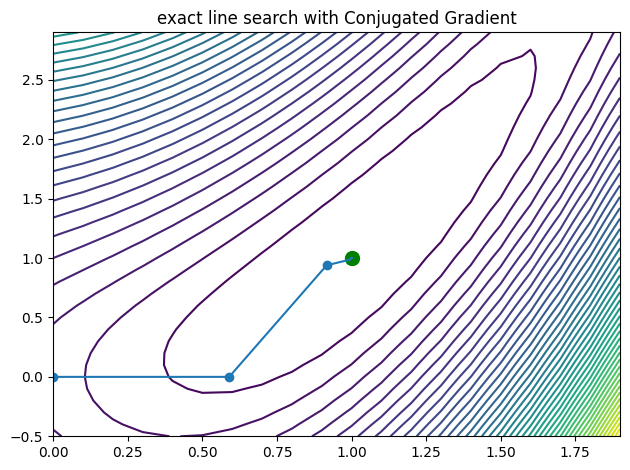

In [64]:

x1 = np.arange(0, 2, 0.1)
x2 = np.arange(-0.5, 3, 0.1)
x = np.meshgrid(x1, x2)
z = aoki_vectorized(np.array(x))
plt.contour(x1, x2, z, 50)
plt.plot(1, 1, "go", markersize=10)
x0 = np.array((0.0, 0.0))
xs, ys= conjugateGradienteDescent(aoki, aoki_gd, x0,step_size=None)
ttl = "exact line search with Conjugated Gradient"
fname = "steepestDescentDemo_linesearch"
print(xs)
print(ys)

plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.title(ttl)
plt.tight_layout()
plt.show()





[0.0, 0.5898539825788157, 0.589546896515463, 0.7277364665787577, 0.7364408772899294, 0.8135501464532775, 0.8207467980840776, 0.8687083152747631, 0.8743110516517831, 0.9061647321070131, 0.9101924871618748, 0.9320508635982971, 0.9349716934745375, 0.9497473264803344, 0.9604980965112238, 0.9718249962051317, 0.996314218144182, 0.9987945791287466, 0.9996084282722314, 0.9993812457790285, 0.9997931604091478, 0.999676860373066, 0.9998904638487689, 0.9998298167936603, 0.9999419021435567, 0.9999099874071617, 0.999969157875409, 0.9999522848226337, 0.9999836191511033, 0.9999746768590985, 0.9999912975729673, 0.9999865523383233, 0.999995376145086, 0.9999928563852563, 0.999997543029739, 0.9999962045381423, 0.9999986943926743, 0.9999979832538065, 0.9999993062000152, 0.9999989283348435, 0.9999996313104759, 0.9999994305202748, 0.9999998040749976, 0.999999697375962, 0.999999895883328, 0.9999998391830714, 0.9999999446711789, 0.9999999145402144, 0.9999999705975895, 0.9999999545856887, 0.9999999843751955, 0.

Text(0.5, 1.0, 'exact line search with Gradient Descent')

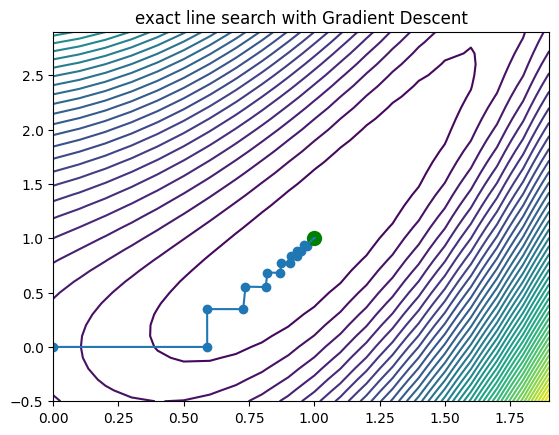

In [66]:
x1 = np.arange(0, 2, 0.1)
x2 = np.arange(-0.5, 3, 0.1)
x = np.meshgrid(x1, x2)
z = aoki_vectorized(np.array(x))
plt.contour(x1, x2, z, 50)
plt.plot(1, 1, "go", markersize=10)

x0 = np.array((0.0, 0.0))
xs, ys, fx = gradient_descent(x0, aoki, aoki_gd, hessian=aoki_hess, stepsize=None)
ttl = "exact line search with Gradient Descent"
fname = "steepestDescentDemo_linesearch"
print(xs)
print(ys)

plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.title(ttl)